In [2]:
from pyedflib import highlevel
import numpy as np
import glob
import matplotlib.pyplot as plt

path = "C:/Users/hallym/Desktop/SleepEDF/sleep-cassette"
# path = '[my_path]/sleep-edfx/1.0.0/sleep-cassette'
data_list = glob.glob(path+'/**')
trains = [x for x in data_list if x.endswith('PSG.edf')]
labels = [x for x in data_list if x.endswith('Hypnogram.edf')]

result = []
Max_num = 152 + 1

In [3]:
sample = 1
sleep_data_signal = highlevel.read_edf(trains[sample])[0]
sleep_data_label = highlevel.read_edf(trains[sample])[1]
sleep_data1_test = highlevel.read_edf(labels[sample])

# print(sleep_data1)

for signal, info in zip(sleep_data_signal, sleep_data_label):
    print(signal.shape, info['label'], info['sample_rate'], signal.shape[0]//info['sample_rate'])

(8490000,) EEG Fpz-Cz 3000.0 2830.0
(8490000,) EEG Pz-Oz 3000.0 2830.0
(8490000,) EOG horizontal 3000.0 2830.0
(84900,) Resp oro-nasal 30.0 2830.0
(84900,) EMG submental 30.0 2830.0
(84900,) Temp rectal 30.0 2830.0
(84900,) Event marker 30.0 2830.0


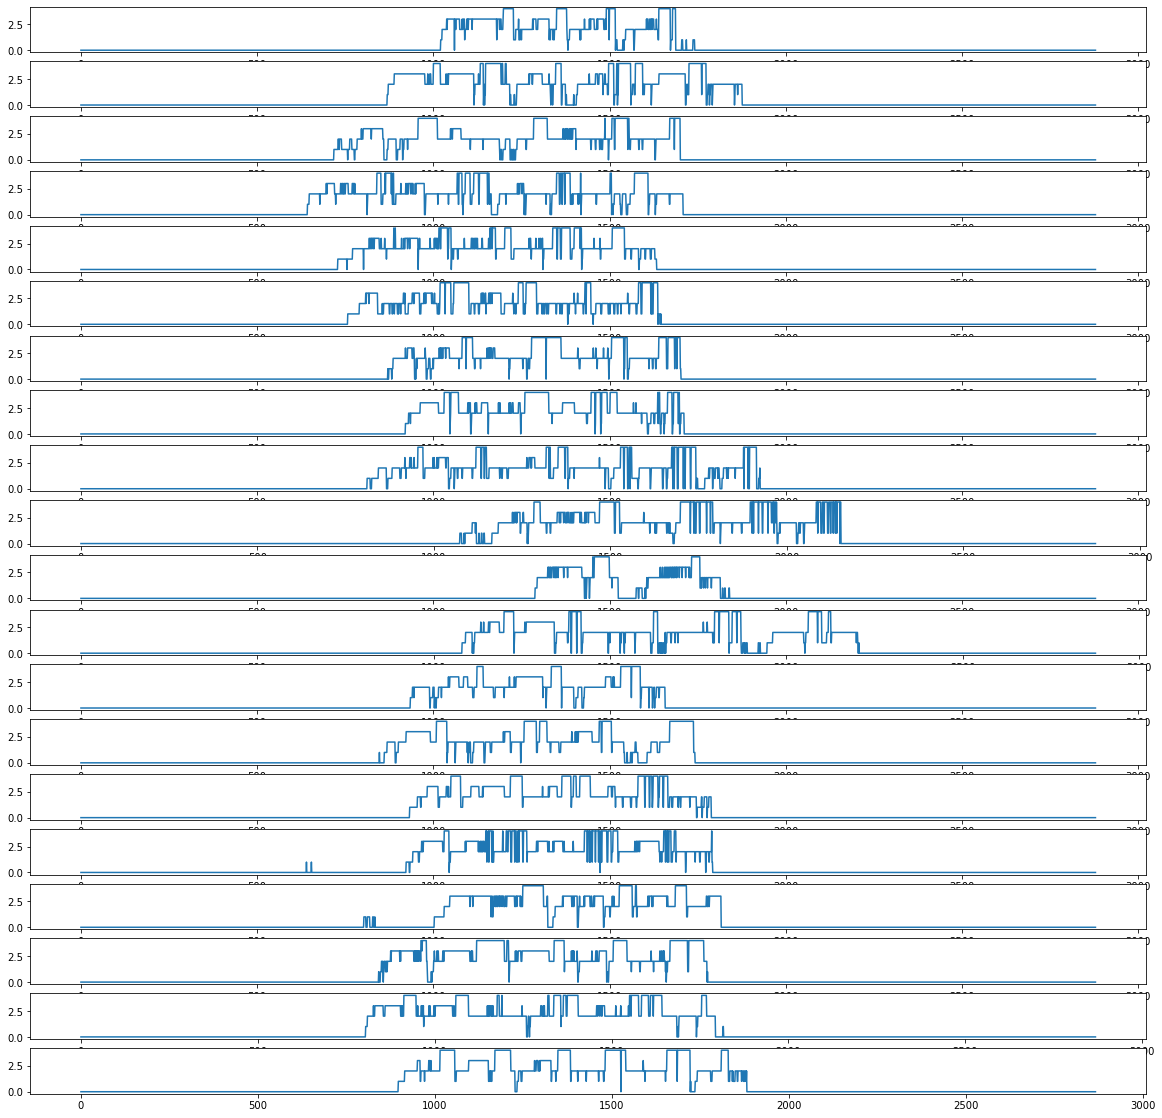

In [4]:
# troblem_list = [3, 19, 24, 71, 79, 82, 91, 92, 93, 109, 110, 117, 126, 127, 143, 144]
sample_number = [
    cnt
    for cnt in range(20) 
]
train = []

sleep_stage = []
for idx in sample_number: # 총 153개의 데이터 
    result = []
    d1 = highlevel.read_edf(trains[idx])[0][0] # 순서대로 읽기 (PSG.edf) -> EEG Fpz-Cz 데이터만 가지고 학습
    train.append(d1)
    
    d2 = highlevel.read_edf(labels[idx])    # 라벨 데이터 (Hypnogram.edf)
    cnt = 0
    for element in d2[-1]['annotations']:   # 라벨 데이터 순회 [start , step , sleep stage] 로 구분
        step = element[1]
        stage = element[2]

        for idx in range(0, int(step), 30):
            
            if stage[-1] == "W":
                result.append(0)                    
            elif stage[-1] == "1":
                result.append(1)
            elif stage[-1] == "2":
                result.append(2)
            elif stage[-1] == "3" or stage[-1] == '4':
                result.append(3)
            elif stage[-1] == "R":
                result.append(4)         
            elif stage[-1] == "?":
                result.append(0)      
                continue

            
            # if stage[-1] == "e":
            #     sleep_stage.append(d2[-1]['annotations'][cnt+1][2][-1])
            #     continue

            # sleep_stage.append(stage[-1])
        
        cnt+=1
    sleep_stage.append(result)
    # print(result)
    

plt.figure(figsize = (20,20))
for idx in range(1, 20+1):
    plt.subplot(20,1,idx)
    plt.plot(sleep_stage[idx-1])
plt.show()

In [5]:
# troblem_list = [3, 19, 24, 71, 79, 82, 91, 92, 93, 109, 110, 117, 126, 127, 143, 144]
# sleep_stage = []

# for idx in range(0,1, 1): # 총 153개의 데이터 
#     d1 = highlevel.read_edf(trains[idx])[0][0] # 순서대로 읽기 (PSG.edf) 중 EEG Fpz-Cz 데이터만 가지고 학습
#     d2 = highlevel.read_edf(labels[idx])    # 라벨 데이터 (Hypnogram.edf)
#     cnt = 0
#     for element in d2[-1]['annotations']:   # 라벨 데이터 순회 [start , step , sleep stage] 로 구분
#         step = element[1]
#         stage = element[2]

#         for idx in range(0, int(step), 30):
#             if stage[-1] == "e":
#                 sleep_stage.append(d2[-1]['annotations'][cnt+1][2][-1])
#                 continue

#             sleep_stage.append(stage[-1])

#         cnt+=1

# plt.figure(figsize = (20,5))
# plt.plot(sleep_stage)
# plt.show()

In [6]:
train.__len__()

20

In [7]:
start_zero = []
stop_zero = []
for element in sleep_stage:
    cnt = 0
    for e in element:
        if e != 0:
            # print(cnt)
            start_zero.append(cnt)
            break
        
        cnt+=1
        
for element in sleep_stage:
    cnt = 0
    element = element[::-1]
    # print(element)
    for e in element:
        if e != 0:
            # print(cnt)
            stop_zero.append(element.__len__() - cnt)
            break
        
        cnt+=1
        
print(start_zero)
print(stop_zero)

[1021, 869, 718, 643, 729, 757, 871, 921, 812, 1074, 1289, 1081, 935, 847, 933, 640, 803, 845, 805, 897]
[1742, 1876, 1701, 1709, 1634, 1646, 1703, 1712, 1927, 2154, 1841, 2207, 1658, 1743, 1789, 1793, 1817, 1779, 1817, 1882]


In [8]:
sleep_label = []
sleep_train = []
idx = 0
for element, signal in zip(sleep_stage, train):
    tmp = element[start_zero[idx]-60: stop_zero[idx]+60]
    train_tmp = signal[(start_zero[idx]-60)*3000 : (stop_zero[idx]+60)*3000]
    print(tmp.__len__(),  train_tmp.__len__()//3000)
    sleep_label.append(tmp)
    sleep_train.append(train_tmp)
    idx+=1
print(sleep_label.__len__(), sleep_train.__len__())

841 841
1127 1127
1103 1103
1186 1186
1025 1025
1009 1009
952 952
911 911
1235 1235
1200 1200
672 672
1246 1246
843 843
1016 1016
976 976
1273 1273
1134 1134
1054 1054
1132 1132
1105 1105
20 20


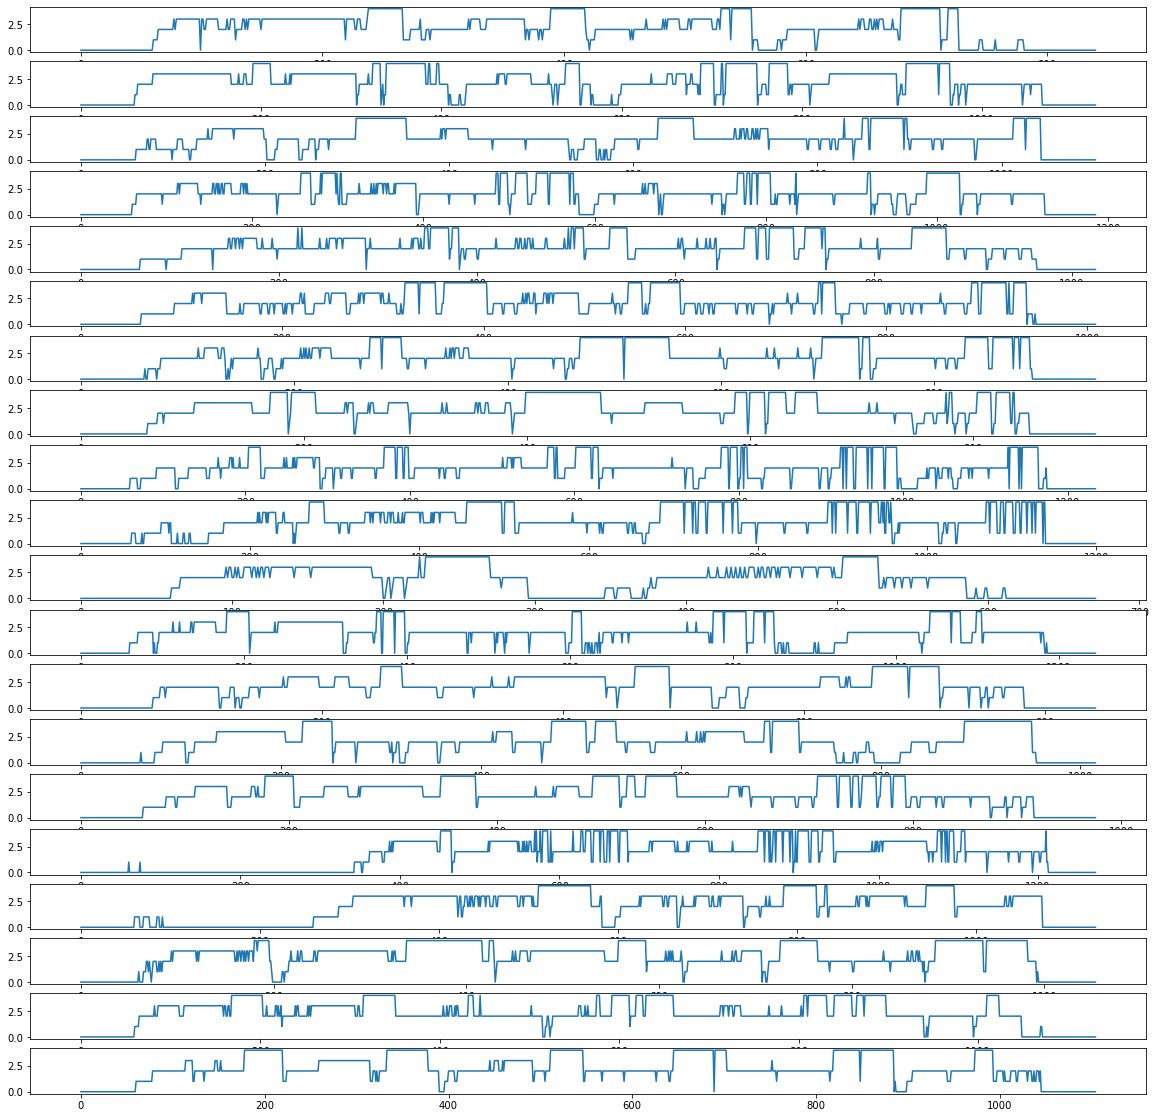

In [9]:
plt.figure(figsize = (20,20))
for idx in range(1, 20+1):
    plt.subplot(20,1,idx)
    plt.plot(sleep_label[idx-1])
plt.show()

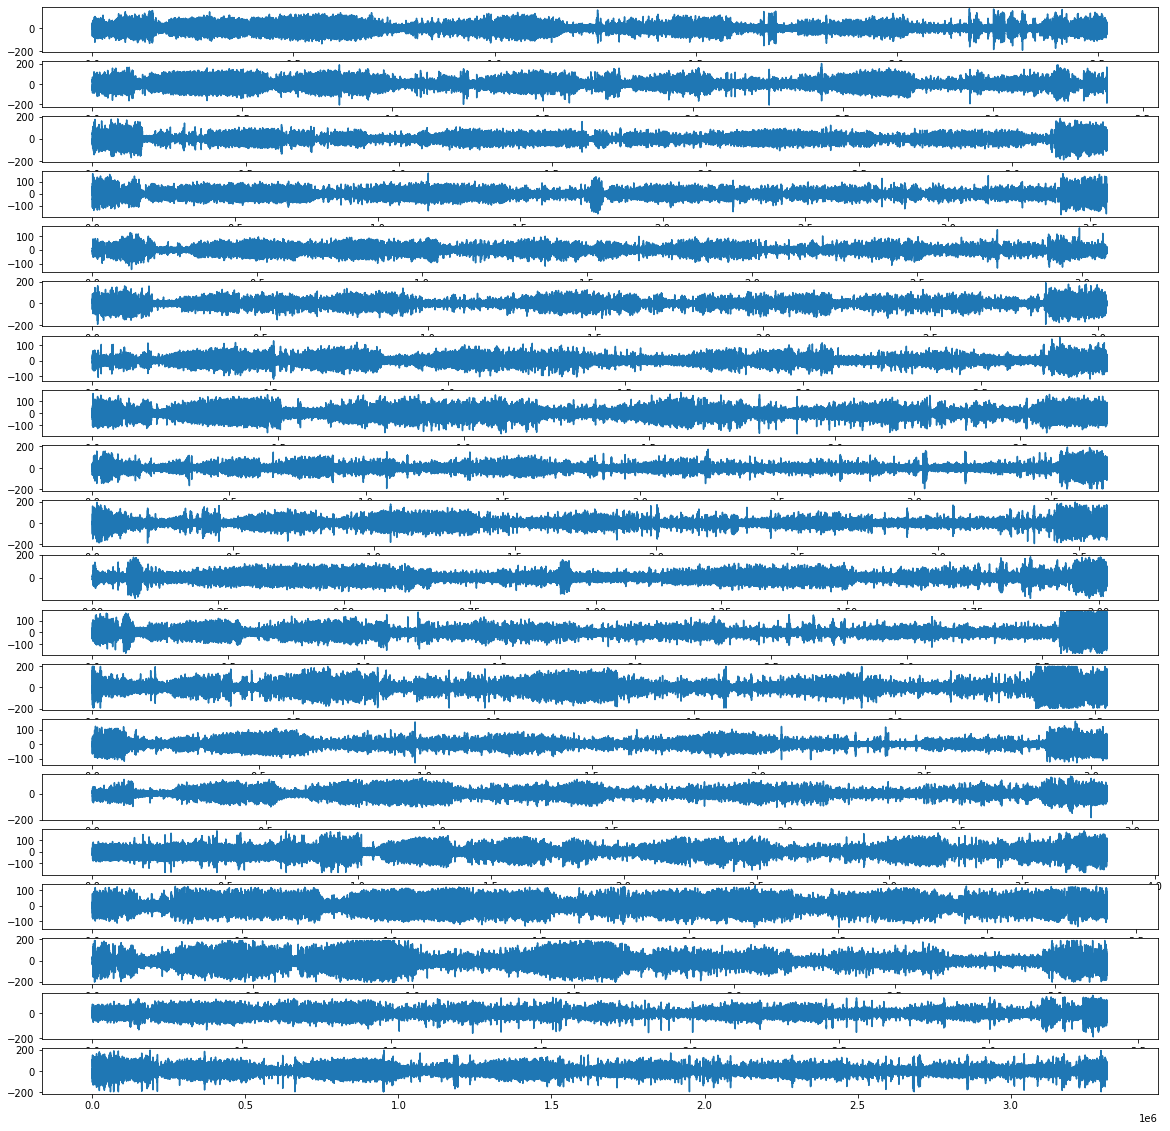

In [10]:
plt.figure(figsize = (20,20))
for idx in range(1, 20+1):
    plt.subplot(20,1,idx)
    plt.plot(sleep_train[idx-1])
plt.show()

# 본격적인 프로그래밍 시작

In [11]:
sleep_train[0]

array([  8.11135531,  17.48864469,  21.23956044, ..., -17.58241758,
       -10.45567766, -13.45641026])

In [12]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm, trange
import random
import pandas as pd
from PIL import Image
from pathlib import Path
from collections import OrderedDict
from time import time, ctime, localtime
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary


import torchvision
import torchvision.transforms as transforms

from torchvision import datasets
from torchvision import models

import cv2

from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split,train_test_split
from sklearn.model_selection import StratifiedKFold,  KFold

In [13]:
import torch 
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
    
device

'cuda'

In [14]:
save_path = "sleep-patient-numpy/"

pre_train = []
for idx in range(20):
    signal = np.array(sleep_train[idx])
    label = np.array(sleep_label[idx])
    signal = signal.reshape(-1, 1, 3000)
    label = label.reshape(-1)
    
    np.save(save_path + "train_patient" + str(idx) + ".npy" ,signal)
    np.save(save_path + "label_patient" + str(idx) + ".npy" ,label)

In [16]:
# trainloader = DataLoader(sleep_train, batch_size=200, shuffle=False, num_workers=2)
# dataiter = iter(trainloader)
# images = dataiter.next()
# print(images, images.shape)

In [17]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class DeepSleepNet(nn.Module):
    def __init__(self, in_channel = 1, small_Fs = 8, big_Fs = 6, Fs = 100):
        super().__init__()
        
        self.smallCNN = nn.Sequential(
            nn.Conv1d(in_channels = 1, out_channels = 64 , kernel_size = Fs//2 , stride = Fs//16, padding = Fs//2//2, bias = False),
            nn.BatchNorm1d(64),
            nn.ReLU(True),
            
            nn.MaxPool1d(kernel_size = 8, stride = 8,  padding = 4),
            nn.Dropout(0.5),
            
            nn.Conv1d(in_channels = 64 , out_channels = 128 , kernel_size = small_Fs, 
                      stride = 1, padding= small_Fs//2, bias = False),
            nn.BatchNorm1d(128),
            nn.ReLU(True),
                        
            nn.Conv1d(in_channels = 128 , out_channels = 128 , kernel_size = small_Fs, 
                      stride = 1, padding = small_Fs//2, bias = False),
            nn.BatchNorm1d(128),
            nn.ReLU(True),
            
            nn.Conv1d(in_channels = 128 , out_channels = 128 , kernel_size = small_Fs, 
                      stride = 1, padding= small_Fs//2, bias = False),
            nn.BatchNorm1d(128),
            nn.ReLU(True),
            
            nn.MaxPool1d(kernel_size = 4, stride = 4,  padding = 2)
        )

        
        self.bigCNN = nn.Sequential(
            nn.Conv1d(in_channels = 1, out_channels = 64 , kernel_size = Fs*4 , stride = Fs//2, padding = Fs*4//2, bias = False),
            nn.BatchNorm1d(64),
            nn.ReLU(True),
            
            nn.MaxPool1d(kernel_size = 4, stride = 4,  padding = 2), # padding = filter_size//2
            nn.Dropout(0.5) ,
            
            nn.Conv1d(in_channels = 64 , out_channels = 128 , kernel_size = big_Fs, stride = 1, padding= big_Fs//2, bias = False),
            nn.BatchNorm1d(128),
            nn.ReLU(True),
                        
            nn.Conv1d(in_channels = 128 , out_channels = 128 , kernel_size = big_Fs, stride = 1, padding= big_Fs//2, bias = False),
            nn.BatchNorm1d(128),
            nn.ReLU(True),
            
            nn.Conv1d(in_channels = 128 , out_channels = 128 , kernel_size = big_Fs, stride = 1, padding= big_Fs//2, bias = False),
            nn.BatchNorm1d(128),
            nn.ReLU(True),
            
            nn.MaxPool1d(kernel_size = 2, stride = 2,  padding = 1)
        )
        
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(1280 + 2176, 6)  # big and small conv concat     
        )

    def forward(self, x):
        small = self.smallCNN(x)
        big = self.bigCNN(x)
        
        feature_big = torch.flatten(big, 1)
        feature_small = torch.flatten(small, 1)  # (batch, channel)
        output = torch.cat((feature_big, feature_small), dim=1)
        output = self.fc(output)
        return(output)




In [18]:
model = DeepSleepNet()
model.to(device)
summary(model.cuda(),(1,3000))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1              [-1, 64, 501]           3,200
       BatchNorm1d-2              [-1, 64, 501]             128
              ReLU-3              [-1, 64, 501]               0
         MaxPool1d-4               [-1, 64, 63]               0
           Dropout-5               [-1, 64, 63]               0
            Conv1d-6              [-1, 128, 64]          65,536
       BatchNorm1d-7              [-1, 128, 64]             256
              ReLU-8              [-1, 128, 64]               0
            Conv1d-9              [-1, 128, 65]         131,072
      BatchNorm1d-10              [-1, 128, 65]             256
             ReLU-11              [-1, 128, 65]               0
           Conv1d-12              [-1, 128, 66]         131,072
      BatchNorm1d-13              [-1, 128, 66]             256
             ReLU-14              [-1, 

In [19]:
for idx in range(20): # 20개의 환자 데이터를 가지고 학습
    patient_train = np.load("../SleepEDF/sleep-patient-numpy/train_patient" + str(idx) + ".npy")
    patient_label = np.load("../SleepEDF/sleep-patient-numpy/label_patient" + str(idx) + ".npy")
    
    print(patient_train.shape[0])

841
1127
1103
1186
1025
1009
952
911
1235
1200
672
1246
843
1016
976
1273
1134
1054
1132
1105


In [20]:
criterion = nn.CrossEntropyLoss().to(device) # Cost Function으로 CrossEntropy 사용
optimizer = optim.Adam(model.parameters(), lr=0.001, betas = [0.9, 0.999]) # 기본적인 Adam 사용 후 lr 및 Optimizier 변경 예정
model.to(device) # model을 gpu에 올리기

DeepSleepNet(
  (smallCNN): Sequential(
    (0): Conv1d(1, 64, kernel_size=(50,), stride=(6,), padding=(25,), bias=False)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool1d(kernel_size=8, stride=8, padding=4, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.5, inplace=False)
    (5): Conv1d(64, 128, kernel_size=(8,), stride=(1,), padding=(4,), bias=False)
    (6): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(4,), bias=False)
    (9): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv1d(128, 128, kernel_size=(8,), stride=(1,), padding=(4,), bias=False)
    (12): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): MaxPool1d(kernel_size=

In [29]:
epochs = 100 # 반복 수는 100
batch_size=200
cnt = 0      # early stopping을 적용하기 위해 만들어놓은 cnt

# train 및 val Loss 저장 
train_loss = torch.zeros(epochs)
val_loss = torch.zeros(epochs)

# train 및 val Accuracy 저장 
train_acc = torch.zeros(epochs)
val_acc = torch.zeros(epochs)

# 초기 Loss값은 무한대
valid_loss_min = np.Inf

# epochs 수만큼 학습 진행
print("===== Start Learning =====")
for epoch in range(epochs):
    model.train()
    sums = 0
    
    for idx in range(19): # 20개의 환자 데이터를 가지고 학습
        patient_train = np.load("../SleepEDF/sleep-patient-numpy/train_patient" + str(idx) + ".npy")
        patient_label = np.load("../SleepEDF/sleep-patient-numpy/label_patient" + str(idx) + ".npy")
        
        for space in range(0, patient_train.shape[0]+1, batch_size):
            
            if space + batch_size > patient_train.shape[0]: fin = patient_train.shape[0]
            else: fin = space+batch_size
            
            inputs = patient_train[space:fin]
            labels = patient_label[space:fin]
    
            inputs = inputs.reshape(-1, 1, 3000)
            if inputs.shape == (0, 1, 3000): continue
        
            # print(inputs.shape)
            inputs = torch.tensor(inputs, dtype=torch.float)
            labels = torch.tensor(labels, dtype=torch.int64)
            inputs, labels = inputs.to(device), labels.to(device)
        
        
            optimizer.zero_grad() # optimizer 초기화 -> 모든 gradient를 초기화 시켜줌으로써 이전에 사용했던 기울기에 더해지지않고 새로 구하게 됨
            logits = model.forward(inputs) #logits은 모델이 예측한 값으로 
            # print(logits.shape, labels.shape)

            loss = criterion(logits, labels) # criterion은 이전에 정의한 CrossEntropy를 통해 Loss 계산
            # print(loss)
            loss.backward() # backward를 통해 역전파 실행 계산된 loss를 가지고 모델의 파라미터 개선
            optimizer.step() # optimizer.step()을 통해 개선된 파라미터 적용

            train_loss[epoch] += loss.item() # 에포크당 train_loss 누적

            ps = F.softmax(logits, dim=1) # softmax함수를 통한 정규화 (0 ~ 1) 사이의 확률로 만들어줌
            top_p, top_class = ps.topk(1, dim=1) # topk를 통해 가장 높은 한개를 뽑음
            
            equals = top_class == labels.reshape(top_class.shape)   # 일치하는지 확인.
            # print(equals.shape, torch.mean(equals.type(torch.FloatTensor)).item())
                
            # print(equals.shape, torch.mean(equals.type(torch.FloatTensor)).item())
            
            train_acc[epoch] += torch.mean(equals.type(torch.FloatTensor)).item()  # 정확도 계산을 위해 float로 타입 변환 후 mean 계산.
            
            # print(train_acc, train_acc.shape)
            sums+= 1
            
    # Loss의 평균을 구하기
    train_loss[epoch] /= sums
    train_acc[epoch] /= sums
    
    # valid , 모델 검증 시간
    val_sums = 0
    model.eval()   #dropout Layer와 BatchNormLayer는 eval과정에서 필요하지 않기 때문
    with torch.no_grad():  # validation 과정 no_grad()를 통해 Gradient 계산 안함.
        # validloder에 넣어둔 값 들고오기

        for idx in range(19, 20, 1): # 20개의 환자 데이터를 가지고 학습
            patient_train = np.load("../SleepEDF/sleep-patient-numpy/train_patient" + str(idx) + ".npy")
            patient_label = np.load("../SleepEDF/sleep-patient-numpy/label_patient" + str(idx) + ".npy")

            for space in range(0, patient_train.shape[0]+1, batch_size):

                if space + batch_size > patient_train.shape[0]: fin = patient_train.shape[0]
                else: fin = space+batch_size
                
                inputs = patient_train[space:fin]
                labels = patient_label[space:fin]
                
                inputs = inputs.reshape(-1, 1, 3000)
                inputs = torch.tensor(inputs, dtype=torch.float)
                labels = torch.tensor(labels, dtype=torch.int64)
                inputs, labels = inputs.to(device), labels.to(device)
            
                # 위에서 train 후 validation 실행. train한번 당 validation 1번 실행.
                logits = model.forward(inputs) # validation set인 input값을 넣어서 실행 
                batch_loss = criterion(logits, labels) # validation set의 Loss 계산

                val_loss[epoch] += batch_loss.item() # Loss 값 누적

                # Calculate accuracy
                ps = F.softmax(logits, dim=1) # 확률값 구하기 (0~1) 사이로 정규화가 됨
                top_p, top_class = ps.topk(1, dim=1) # 가장 높은값 하나를 고르는데 그 값과 idx가져옴
                equals = top_class == labels.view(*top_class.shape) # 일치하는지 확인 
                val_acc[epoch] += torch.mean(equals.type(torch.FloatTensor)).item() # # 정확도 계산을 위해 float로 타입 변환 후 mean 계산.
                val_sums+=1
            

        # validation Loss 및 accuracy 평균냄
        val_loss[epoch] /= val_sums
        val_acc[epoch] /= val_sums

    ##################### PRINT LOSS & ACC #####################
    print(f"Epoch {epoch+1}/{epochs}.. "
          f"Train loss: {train_loss[epoch]:.3f}.. "
          f"Train acc: {train_acc[epoch]:.3f}.. "
          f"val loss: {val_loss[epoch]:.3f}.. "
          f"val accuracy: {val_acc[epoch]:.3f}")

    ##################### 최적의 모델 저장 #####################
    if val_loss[epoch] <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        val_loss[epoch]))
        torch.save(model.state_dict(), 'model_best.pt')
        valid_loss_min = val_loss[epoch]

        # 가장 낮은 Loss값을 가지게 된다면 Early Stopping count 초기화
        cnt = 0

    # 20번 이상 Loss 개선이 안된다면 종료
    ############# Early Stopping #############
    if cnt >= 20:
        print("Early Stopping")
        break

    cnt+=1 #Loss 개선 실패
########################################################

===== Start Learning =====
Epoch 1/100.. Train loss: 0.544.. Train acc: 0.809.. val loss: 0.953.. val accuracy: 0.710
Validation loss decreased (inf --> 0.952686).  Saving model ...
Epoch 2/100.. Train loss: 0.522.. Train acc: 0.817.. val loss: 1.037.. val accuracy: 0.687
Epoch 3/100.. Train loss: 0.513.. Train acc: 0.821.. val loss: 0.959.. val accuracy: 0.707
Epoch 4/100.. Train loss: 0.499.. Train acc: 0.825.. val loss: 0.976.. val accuracy: 0.694
Epoch 5/100.. Train loss: 0.500.. Train acc: 0.824.. val loss: 1.000.. val accuracy: 0.698
Epoch 6/100.. Train loss: 0.490.. Train acc: 0.828.. val loss: 0.972.. val accuracy: 0.699
Epoch 7/100.. Train loss: 0.493.. Train acc: 0.826.. val loss: 0.958.. val accuracy: 0.709
Epoch 8/100.. Train loss: 0.478.. Train acc: 0.828.. val loss: 0.948.. val accuracy: 0.704
Validation loss decreased (0.952686 --> 0.947833).  Saving model ...
Epoch 9/100.. Train loss: 0.472.. Train acc: 0.832.. val loss: 0.909.. val accuracy: 0.720
Validation loss decre